In [72]:
import os
import numpy as np
import scipy
import pandas as pd

from sklearn.preprocessing import MinMaxScaler, StandardScaler

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:20,.4f}'.format)
pd.set_option('display.max_colwidth', None)

In [3]:
dictionary = pd.read_csv("../../WiDS2021/DataDictionaryWiDS2021.csv")
dataset = pd.read_csv("../../WiDS2021/TrainingWiDS2021.csv").iloc[:, 1:]

dataset["gender"] = dataset["gender"].replace({"M": "Male", "F": "Female"})

d:\Alberto\ML_DS\ML_DS\MASTER EN CIENCIA DE DATOS\Semestre4\TFM\tfm-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


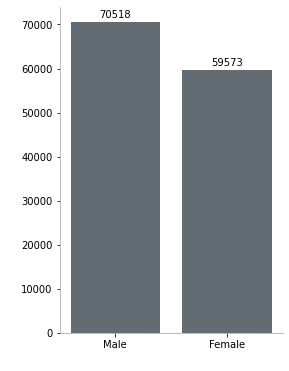

In [4]:
fig, ax = plt.subplots(figsize=(4,6))

ax = sns.countplot(
    dataset["gender"],
    order = dataset["gender"].value_counts().index,
    color="#606B76"
)

ax.set_xlabel(" ")
ax.set_ylabel(" ")

abs_values = dataset["gender"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values, padding=3)

sns.despine()

ax.spines['bottom'].set_color('#adadad')
ax.spines['top'].set_color('#adadad') 
ax.spines['right'].set_color('#adadad')
ax.spines['left'].set_color('#adadad')

ax.xaxis.label.set_color('#adadad')        #setting up X-axis label color to yellow
ax.yaxis.label.set_color('#adadad')          #setting up Y-axis label color to blue

#ax.tick_params(axis='x', colors='#adadad')    #setting up X-axis tick color to red
#ax.tick_params(axis='y', colors='#adadad')

plt.savefig("gender_distribution.jpg", dpi=300)
plt.show()

d:\Alberto\ML_DS\ML_DS\MASTER EN CIENCIA DE DATOS\Semestre4\TFM\tfm-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\Alberto\ML_DS\ML_DS\MASTER EN CIENCIA DE DATOS\Semestre4\TFM\tfm-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


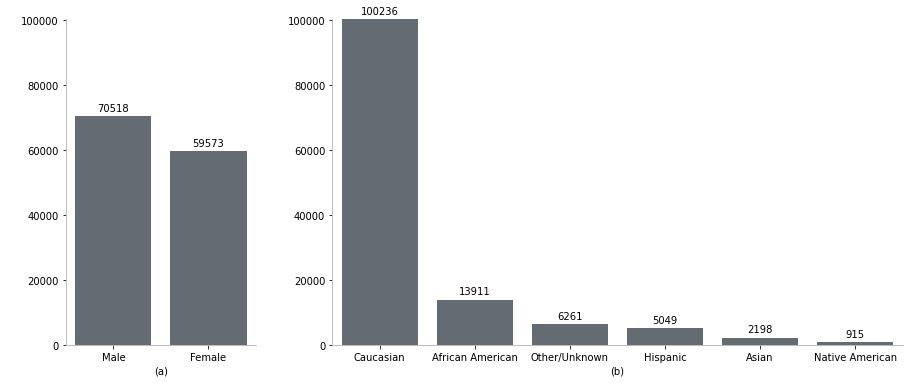

In [135]:
fig, ax = plt.subplots(figsize=(15,6), ncols=2, gridspec_kw={'width_ratios': [1, 3]})

sns.countplot(
    dataset["gender"],
    order = dataset["gender"].value_counts().index,
    color="#606B76",
    ax=ax[0]
)

ax[0].set_xlabel("(a)")
ax[0].set_ylabel(" ")
ax[0].set_ylim(0, 100500)

abs_values = dataset["gender"].value_counts(ascending=False).values
ax[0].bar_label(container=ax[0].containers[0], labels=abs_values, padding=3)

sns.despine()

ax[0].spines['bottom'].set_color('#adadad')
ax[0].spines['top'].set_color('#adadad') 
ax[0].spines['right'].set_color('#adadad')
ax[0].spines['left'].set_color('#adadad')

sns.countplot(
    dataset["ethnicity"],
    order = dataset["ethnicity"].value_counts().index,
    color="#606B76",
    ax=ax[1]
)

ax[1].set_xlabel("(b)")
ax[1].set_ylabel(" ")
ax[1].set_ylim(0, 100500)


abs_values = dataset["ethnicity"].value_counts(ascending=False).values
ax[1].bar_label(container=ax[1].containers[0], labels=abs_values, padding=3)

sns.despine()

ax[1].spines['bottom'].set_color('#adadad')
ax[1].spines['top'].set_color('#adadad') 
ax[1].spines['right'].set_color('#adadad')
ax[1].spines['left'].set_color('#adadad')

#ax.tick_params(axis='x', colors='#adadad')    #setting up X-axis tick color to red
#ax.tick_params(axis='y', colors='#adadad')

plt.savefig("gender_ethnicity_distribution.jpg", dpi=300)
plt.show()

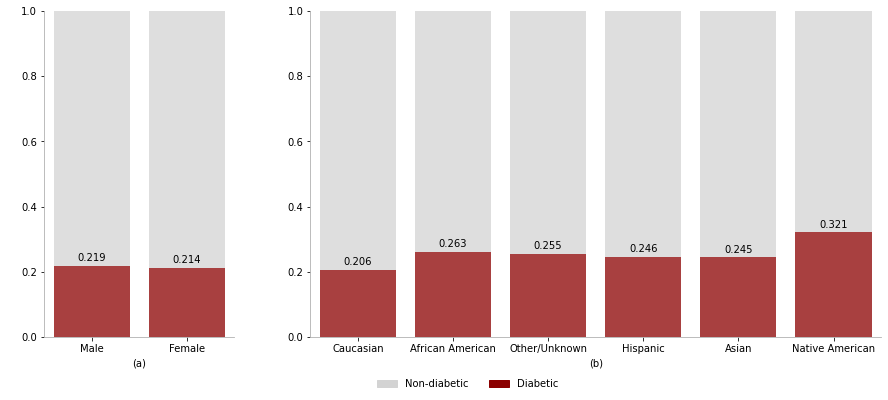

In [137]:
dataset['gender'] = pd.Categorical(dataset['gender'], dataset["gender"].value_counts().index)
dataset['gender'] = pd.Categorical(dataset['gender'], dataset["gender"].value_counts().index)

fig, ax = plt.subplots(figsize=(15,6), ncols=2, gridspec_kw={'width_ratios': [1, 3]})

sns.histplot(
    dataset,
    x="gender",
    hue="diabetes_mellitus",
    stat="probability",
    multiple="fill",
    shrink=.8,
    ax=ax[0],
    palette=["#D3D3D3", "darkred"],
    edgecolor='k', linewidth=0
)

ax[0].set_xlabel("(a)")
ax[0].set_ylabel(" ")
ax[0].set_xlim(-0.5, 1.5)

sns.despine()

ax[0].spines['bottom'].set_color('#adadad')
ax[0].spines['top'].set_color('#adadad') 
ax[0].spines['right'].set_color('#adadad')
ax[0].spines['left'].set_color('#adadad')

rel_values = np.around(pd.crosstab(dataset["gender"], dataset["diabetes_mellitus"], normalize="index")[1].values, decimals=3)
ax[0].bar_label(container=ax[0].containers[0], labels=rel_values, padding=3)

ax[0].get_legend().remove()

sns.histplot(
    dataset,
    x="ethnicity",
    hue="diabetes_mellitus",
    stat="probability",
    multiple="fill",
    shrink=.8,
    ax=ax[1],
    palette=["#D3D3D3", "darkred"],
    edgecolor='k', linewidth=0
)

ax[1].set_xlabel("(b)")
ax[1].set_ylabel(" ")
ax[1].set_xlim(-0.5, 5.5)

sns.despine()

ax[1].spines['bottom'].set_color('#adadad')
ax[1].spines['top'].set_color('#adadad') 
ax[1].spines['right'].set_color('#adadad')
ax[1].spines['left'].set_color('#adadad')

rel_values = np.around(pd.crosstab(dataset["ethnicity"], dataset["diabetes_mellitus"], normalize="index")[1].values, decimals=3)
ax[1].bar_label(container=ax[1].containers[0], labels=rel_values, padding=3, color='black')

#ax.tick_params(axis='x', colors='#adadad')    #setting up X-axis tick color to red
#ax.tick_params(axis='y', colors='#adadad')
ax[1].get_legend().remove()

red_patch = mpatches.Patch(color='#D3D3D3', label='Non-diabetic')
blue_patch = mpatches.Patch(color='darkred', label='Diabetic')

plt.legend(handles=[red_patch, blue_patch], bbox_to_anchor=(0.45, -0.1), ncol=5, frameon=False)

plt.savefig("gender_ethnicity_perc.jpg", dpi=300)
plt.show()

In [138]:
70518 / (70518+59573)

0.542066707151148

In [141]:
dataset["ethnicity"].value_counts(normalize=True)

Caucasian                        0.7796
African American                 0.1082
Other/Unknown                    0.0487
Hispanic                         0.0393
Asian                            0.0171
Native American                  0.0071
Name: ethnicity, dtype: float64